# Tarea 2: Cálculo de Derivadas Numéricas

Cálculo del gradiente de presión usando diferentes métodos de diferenciación numérica.

## Datos del problema

Datos de presión en función de la posición z:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Datos del problema
z = np.array([0, 0.5, 1.0, 1.5, 2.0])  # Posición (m)
P = np.array([1.82, 1.48, 1.19, 0.61, 0.15])  # Presión (kPa)

print(f"Posición z (m): {z}")
print(f"Presión P (kPa): {P}")

Posición z (m): [0.  0.5 1.  1.5 2. ]
Presión P (kPa): [1.82 1.48 1.19 0.61 0.15]


Implementación de los tres métodos de diferenciación:

In [4]:
def derivada_adelante(x, y, h=None):
    """
    Calcula la derivada usando diferencias hacia adelante
    f'(x) = (f(x+h) - f(x)) / h
    """
    if h is None:
        h = x[1] - x[0]  # Usar espaciado de los datos
    
    derivada = np.zeros(len(x))
    
    # Para todos los puntos excepto el último
    for i in range(len(x) - 1):
        derivada[i] = (y[i + 1] - y[i]) / h
    
    # Para el último punto, usar diferencia hacia atrás
    derivada[-1] = (y[-1] - y[-2]) / h
    
    return derivada

def derivada_atras(x, y, h=None):
    """
    Calcula la derivada usando diferencias hacia atrás
    f'(x) = (f(x) - f(x-h)) / h
    """
    if h is None:
        h = x[1] - x[0]  # Usar espaciado de los datos
    
    derivada = np.zeros(len(x))
    
    # Para el primer punto, usar diferencia hacia adelante
    derivada[0] = (y[1] - y[0]) / h
    
    # Para todos los puntos excepto el primero
    for i in range(1, len(x)):
        derivada[i] = (y[i] - y[i - 1]) / h
    
    return derivada

def derivada_centrada(x, y, h=None):
    """
    Calcula la derivada usando diferencias centradas
    f'(x) = (f(x+h) - f(x-h)) / (2h)
    """
    if h is None:
        h = x[1] - x[0]  # Usar espaciado de los datos
    
    derivada = np.zeros(len(x))
    
    # Para el primer punto, usar diferencia hacia adelante
    derivada[0] = (y[1] - y[0]) / h
    
    # Para los puntos centrales
    for i in range(1, len(x) - 1):
        derivada[i] = (y[i + 1] - y[i - 1]) / (2 * h)
    
    # Para el último punto, usar diferencia hacia atrás
    derivada[-1] = (y[-1] - y[-2]) / h
    
    return derivada

## Cálculo de las derivadas

In [5]:
# Calcular las derivadas con los tres métodos
dP_dz_adelante = derivada_adelante(z, P)
dP_dz_atras = derivada_atras(z, P)
dP_dz_centrada = derivada_centrada(z, P)

print("\nPosición (m) | Hacia adelante | Hacia atrás | Centradas")
for i in range(len(z)):
    print(f"{z[i]:8.1f} | {dP_dz_adelante[i]:12.3f} | {dP_dz_atras[i]:11.3f} | {dP_dz_centrada[i]:9.3f}")


Posición (m) | Hacia adelante | Hacia atrás | Centradas
     0.0 |       -0.680 |      -0.680 |    -0.680
     0.5 |       -0.580 |      -0.680 |    -0.630
     1.0 |       -1.160 |      -0.580 |    -0.870
     1.5 |       -0.920 |      -1.160 |    -1.040
     2.0 |       -0.920 |      -0.920 |    -0.920


## Gráfica comparativa de los tres métodos

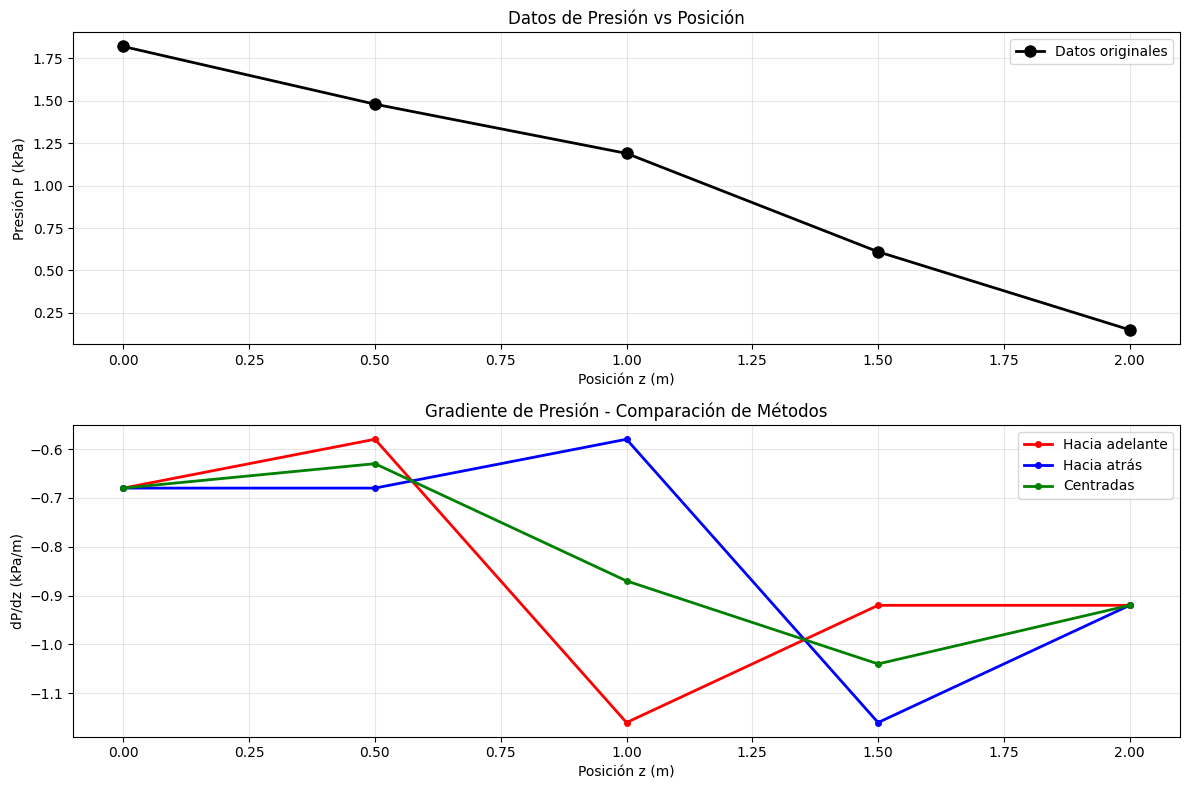

In [6]:
# Crear la gráfica comparativa
plt.figure(figsize=(12, 8))

# Subplot 1: Datos originales
plt.subplot(2, 1, 1)
plt.plot(z, P, 'ko-', linewidth=2, markersize=8, label='Datos originales')
plt.xlabel('Posición z (m)')
plt.ylabel('Presión P (kPa)')
plt.title('Datos de Presión vs Posición')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Derivadas
plt.subplot(2, 1, 2)
plt.plot(z, dP_dz_adelante, 'r.-', linewidth=2, markersize=8, label='Hacia adelante')
plt.plot(z, dP_dz_atras, 'b.-', linewidth=2, markersize=8, label='Hacia atrás')
plt.plot(z, dP_dz_centrada, 'g.-', linewidth=2, markersize=8, label='Centradas')
plt.xlabel('Posición z (m)')
plt.ylabel('dP/dz (kPa/m)')
plt.title('Gradiente de Presión - Comparación de Métodos')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## Animación del efecto de h

Simulación que muestra cómo cambian las derivadas al variar h:

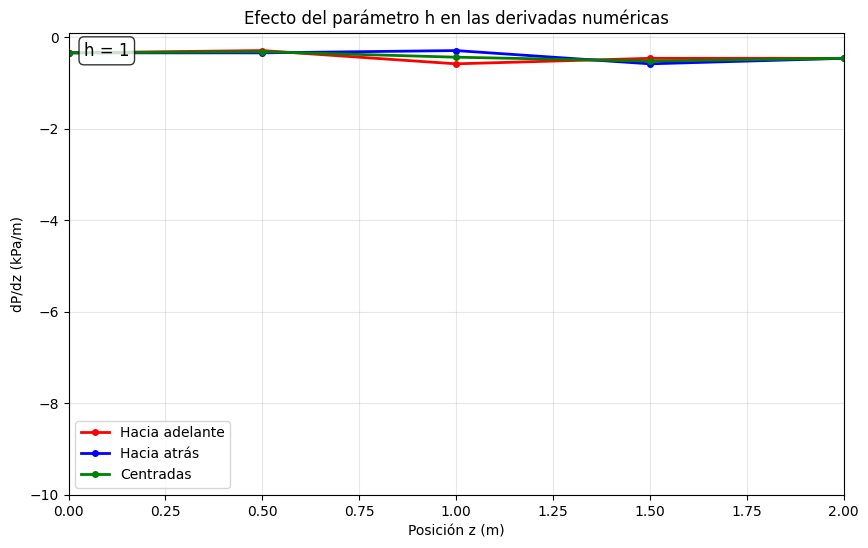

In [ ]:
from IPython.display import HTML

def calcular_derivadas_con_h(z_data, P_data, h):
    """
    Calcula derivadas con diferentes valores de h
    """
    dP_adelante = derivada_adelante(z_data, P_data, h)
    dP_atras = derivada_atras(z_data, P_data, h)
    dP_centrada = derivada_centrada(z_data, P_data, h)
    
    return dP_adelante, dP_atras, dP_centrada, h

# Configuración para la animación
fig, ax = plt.subplots(figsize=(10, 6))

# Líneas para las tres derivadas
line_adelante, = ax.plot([], [], 'r.-', linewidth=2, markersize=8, label='Hacia adelante')
line_atras, = ax.plot([], [], 'b.-', linewidth=2, markersize=8, label='Hacia atrás')
line_centrada, = ax.plot([], [], 'g.-', linewidth=2, markersize=8, label='Centradas')

ax.set_xlim(0, 2.0)
ax.set_ylim(-10.0, 0.1)
ax.set_xlabel('Posición z (m)')
ax.set_ylabel('dP/dz (kPa/m)')
ax.set_title('Efecto del parámetro h en las derivadas numéricas')
ax.grid(True, alpha=0.3)
ax.legend()

# Texto para mostrar el valor actual de h
text_h = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

def animate(frame):
    # Variar h de 1.0 a 0.01
    h_factor = 1.0 - (0.99 * frame / 100)
    
    # Calcular derivadas con el h actual
    dP_adelante, dP_atras, dP_centrada, h_actual = calcular_derivadas_con_h(z, P, h_factor)
    
    # Actualizar las líneas
    line_adelante.set_data(z, dP_adelante)
    line_atras.set_data(z, dP_atras)
    line_centrada.set_data(z, dP_centrada)
    
    # Actualizar texto
    text_h.set_text(f'h = {h_actual:.2g}')
    
    return line_adelante, line_atras, line_centrada, text_h

# Crear y mostrar la animación
anim = FuncAnimation(fig, animate, frames=101, interval=100, blit=False, repeat=True)

# Convertir a HTML para visualización en notebook
HTML(anim.to_jshtml())

## Conclusiones
Notamos como de forma clara la derivada centrada da como resultado un valor intermedio entre los dos metodos, por otro lado notamos como variar el parametro h se destacan las diferencias entre cada metodo, ademas conforme el h se hace mas pequeño, los valores aumentan su magnitudgnitud. Ademas cuando el h toma un valor grade como 1, los tres metodos se comportan de formar similar y tienden a que el valor de la derivada sea 0.
